In [ ]:
"""
:author: Execellent Willie-Pepple
"""

In [2]:
from matplotlib.pyplot import figure

#Task 1
def get_columns(filename:str)-> [str]:
    """
    Reads the first line of the given CSV file and returns a list of its column names.

    Args:
        filename (str): The path to the CSV file.

    Returns:
        [str]: A list of column names.
    """
    with open(filename, 'r') as file:
        line = [x.strip().split(":")[0] for x in file.readlines()]
        return line

In [3]:
ColumnNames = get_columns("../resources/Car_Sales_Info.txt") #extract data from data description
ColumnNames

['Maker',
 'Body_style',
 'Drivetrains',
 'Fuel-type',
 'Engine_type',
 'Num_of_cylinders',
 'Length',
 'Engine_size',
 'Horsepower',
 'City_mpg',
 'Highway_mpg',
 'Price']

In [4]:
#task 3
import pandas as pd
xl_file = pd.ExcelFile("../resources/Car_Sales_Data.xlsx")
xl_file.sheet_names

['Sheet1']

In [5]:
df = xl_file.parse(sheet_name="Sheet1", header=None)
df.columns = ColumnNames
df.set_index(ColumnNames[0], inplace=True)
df

,Body_style,Drivetrains,Fuel-type,Engine_type,Num_of_cylinders,Length,Engine_size,Horsepower,City_mpg,Highway_mpg,Price
Maker,,,,,,,,,,,
dodge,hatchback,fwd,gas,ohc,4,157.3,90,68.0,37,41,5572.0
subaru,wagon,fwd,gas,ohcf,4,173.5,108,82.0,28,32,7463.0
volvo,sedan,rwd,gas,ohc,4,188.8,130,162.0,17,22,18420.0
toyota,sedan,fwd,gas,ohc,4,175.6,122,92.0,29,34,8948.0
jaguar,sedan,rwd,gas,dohc,6,199.6,258,176.0,15,19,32250.0
...,...,...,...,...,...,...,...,...,...,...,...
mazda,hatchback,fwd,gas,ohc,4,177.8,122,84.0,26,32,11245.0
dodge,sedan,fwd,gas,ohc,4,157.3,90,68.0,31,38,7609.0
nissan,sedan,fwd,gas,ohcv,6,184.6,181,152.0,19,25,13499.0


In [6]:
df.shape

(195, 11)

In [7]:
df.head()

,Body_style,Drivetrains,Fuel-type,Engine_type,Num_of_cylinders,Length,Engine_size,Horsepower,City_mpg,Highway_mpg,Price
Maker,,,,,,,,,,,
dodge,hatchback,fwd,gas,ohc,4,157.3,90,68.0,37,41,5572.0
subaru,wagon,fwd,gas,ohcf,4,173.5,108,82.0,28,32,7463.0
volvo,sedan,rwd,gas,ohc,4,188.8,130,162.0,17,22,18420.0
toyota,sedan,fwd,gas,ohc,4,175.6,122,92.0,29,34,8948.0
jaguar,sedan,rwd,gas,dohc,6,199.6,258,176.0,15,19,32250.0


In [8]:
filtered_data = df.groupby("Maker").filter(lambda x: x["Body_style"].nunique() < 6)
filtered_data

,Body_style,Drivetrains,Fuel-type,Engine_type,Num_of_cylinders,Length,Engine_size,Horsepower,City_mpg,Highway_mpg,Price
Maker,,,,,,,,,,,
dodge,hatchback,fwd,gas,ohc,4,157.3,90,68.0,37,41,5572.0
subaru,wagon,fwd,gas,ohcf,4,173.5,108,82.0,28,32,7463.0
volvo,sedan,rwd,gas,ohc,4,188.8,130,162.0,17,22,18420.0
toyota,sedan,fwd,gas,ohc,4,175.6,122,92.0,29,34,8948.0
jaguar,sedan,rwd,gas,dohc,6,199.6,258,176.0,15,19,32250.0
...,...,...,...,...,...,...,...,...,...,...,...
mazda,hatchback,fwd,gas,ohc,4,177.8,122,84.0,26,32,11245.0
dodge,sedan,fwd,gas,ohc,4,157.3,90,68.0,31,38,7609.0
nissan,sedan,fwd,gas,ohcv,6,184.6,181,152.0,19,25,13499.0


In [9]:
filtered_data["Drivetrains"].unique()

array(['fwd', 'rwd', nan, '4wd'], dtype=object)

In [10]:
filtered_data["Drivetrains"] = filtered_data["Drivetrains"].fillna(filtered_data["Drivetrains"].mode()[0] )
filtered_data['Drivetrains'].unique()

array(['fwd', 'rwd', '4wd'], dtype=object)

In [11]:
filtered_data["Horsepower"] = filtered_data["Horsepower"].fillna(filtered_data["Horsepower"].mean())

In [12]:
filtered_data["Price"] = filtered_data["Price"].fillna(filtered_data["Price"].mean())

In [13]:
filtered_data.shape

(195, 11)

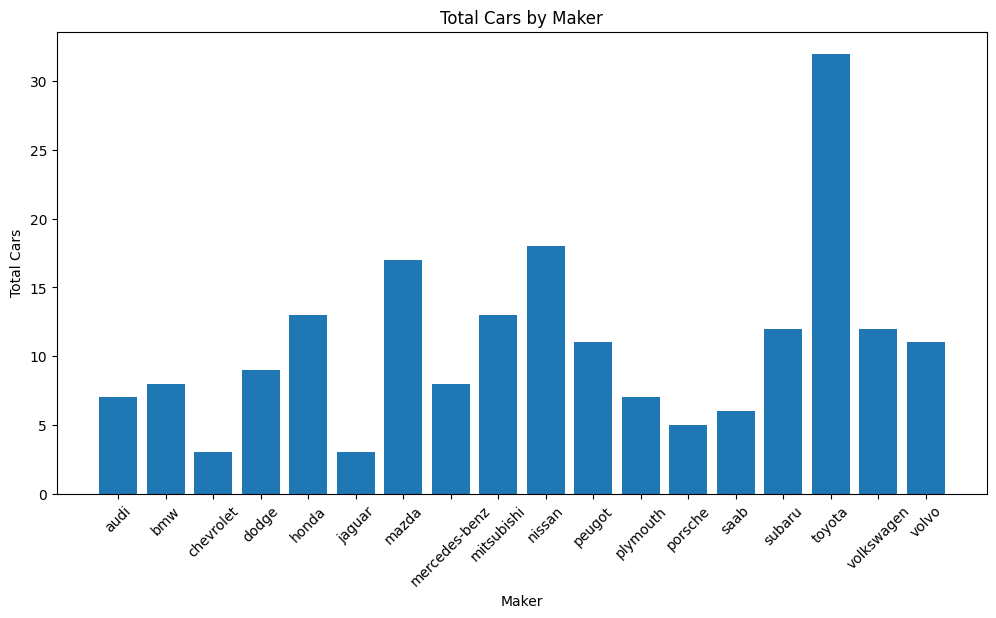

In [14]:
#task 4.1
import matplotlib.pyplot as plt
maker_count = filtered_data.index.value_counts().reset_index() #count the number of cars with the same maker
maker_count.columns = ["Maker", "Total_Cars"]
maker_count = maker_count.sort_values("Maker") #sort by maker

plt.figure(figsize=(12,6))
plt.bar(maker_count["Maker"], maker_count["Total_Cars"])
plt.xlabel("Maker")
plt.ylabel("Total Cars")
plt.title("Total Cars by Maker")
plt.xticks(rotation=45)
plt.show()


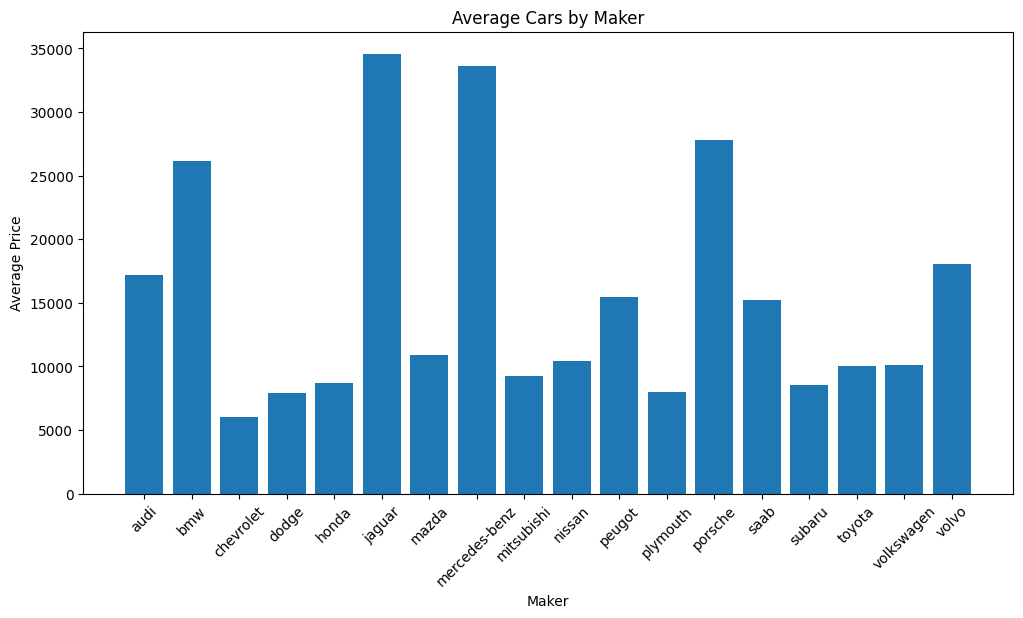

In [15]:
#task 4.2
sample_data = filtered_data.groupby("Maker")["Price"].mean()
sample_data = sample_data.reset_index().sort_values("Maker")
plt.figure(figsize=(12,6))
plt.bar(sample_data["Maker"], sample_data["Price"])
plt.xlabel("Maker")
plt.ylabel("Average Price")
plt.title("Average Cars by Maker")
plt.xticks(rotation=45)
plt.show()

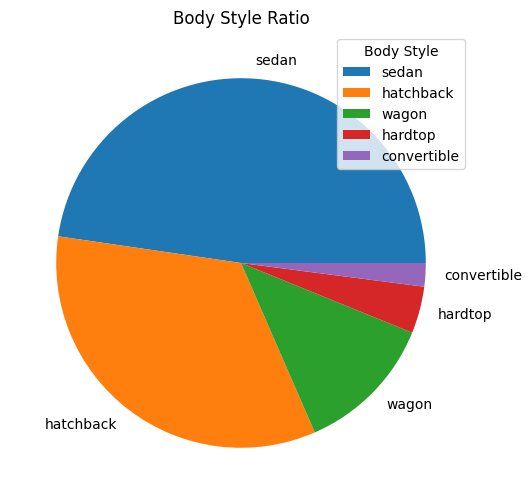

In [16]:
#task 4.3
body_style = filtered_data["Body_style"].value_counts().reset_index() #count the number of cars with the same body style
body_style.columns = ["label", "data"]
plt.figure(figsize=(15,6))
plt.pie(body_style["data"], labels=body_style["label"])
plt.legend(title="Body Style")
plt.title("Body Style Ratio")

plt.show();

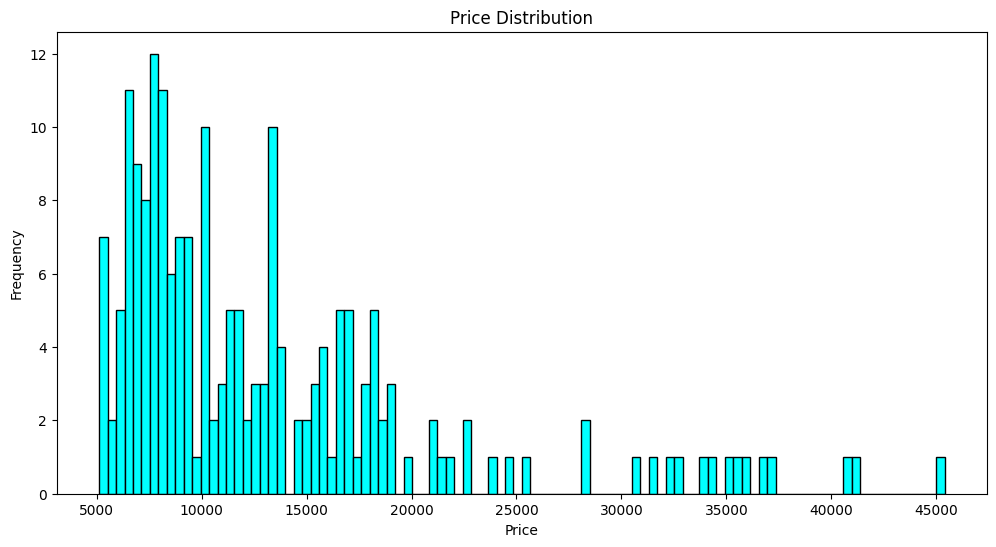

In [17]:
#task 4.4
plt.figure(figsize=(12,6))
plt.hist(filtered_data["Price"], color="cyan", edgecolor="black", bins=100)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show();

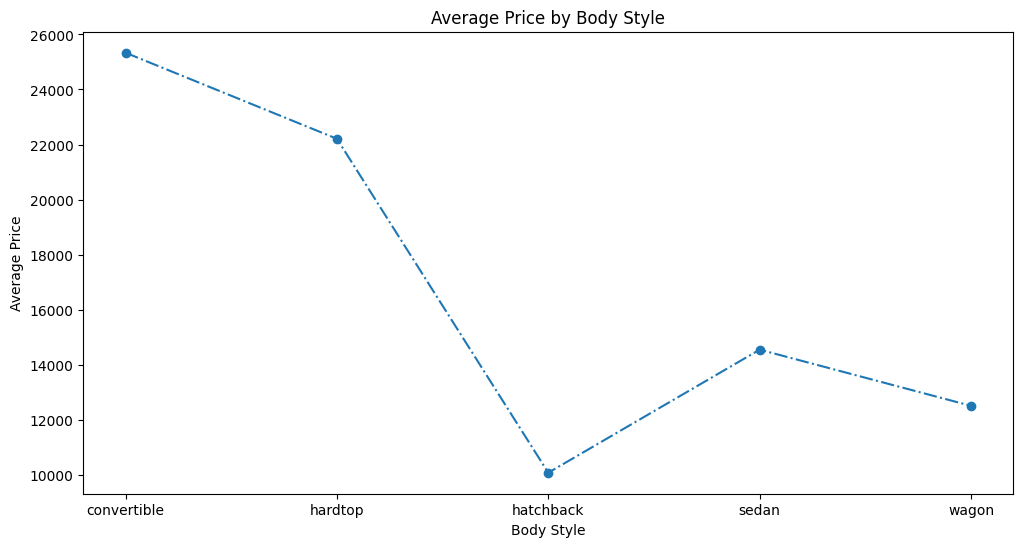

In [18]:
#task 4.5
price_by_bodystyle = filtered_data.groupby("Body_style")["Price"].mean()

plt.figure(figsize=(12,6))
plt.plot(price_by_bodystyle, linestyle="dashdot", marker="o")
plt.xlabel("Body Style")
plt.ylabel("Average Price")
plt.title("Average Price by Body Style")
plt.show();

In [19]:
#task 4.6
normalize_column = lambda column, frame: (frame[column] - frame[column].min()) / (frame[column].max() - frame[column].min())

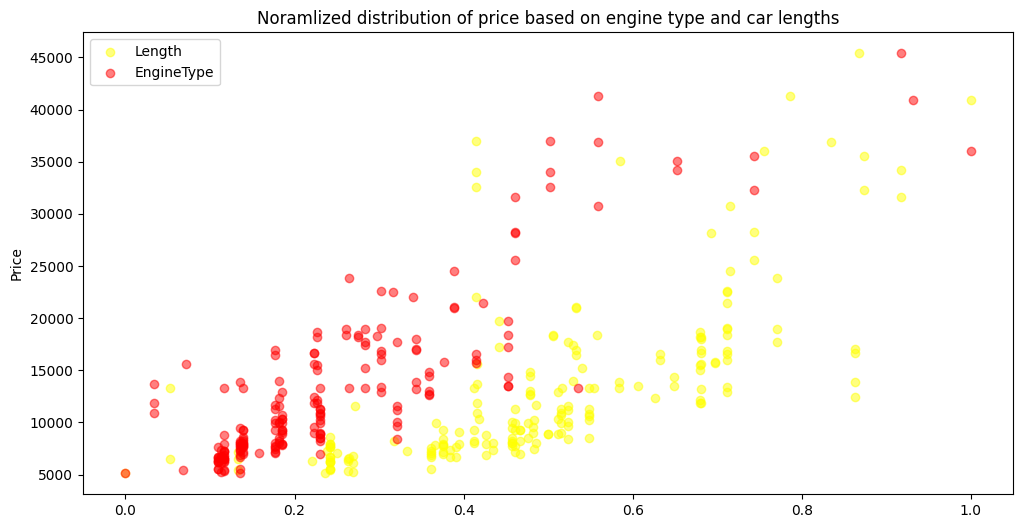

In [20]:
sample_data = filtered_data[["Price", "Length", "Engine_size"]]
normalized_engine_size = normalize_column("Engine_size", sample_data)
normalized_length = normalize_column("Length", sample_data)
plt.figure(figsize=(12,6))
plt.scatter(normalized_length, sample_data["Price"], color="yellow", label="Length", alpha=0.5)
plt.scatter(normalized_engine_size, sample_data["Price"] , color="red", label="EngineType", alpha=0.5)
plt.legend()
plt.ylabel("Price")
plt.title("Noramlized distribution of price based on engine type and car lengths")
plt.show();

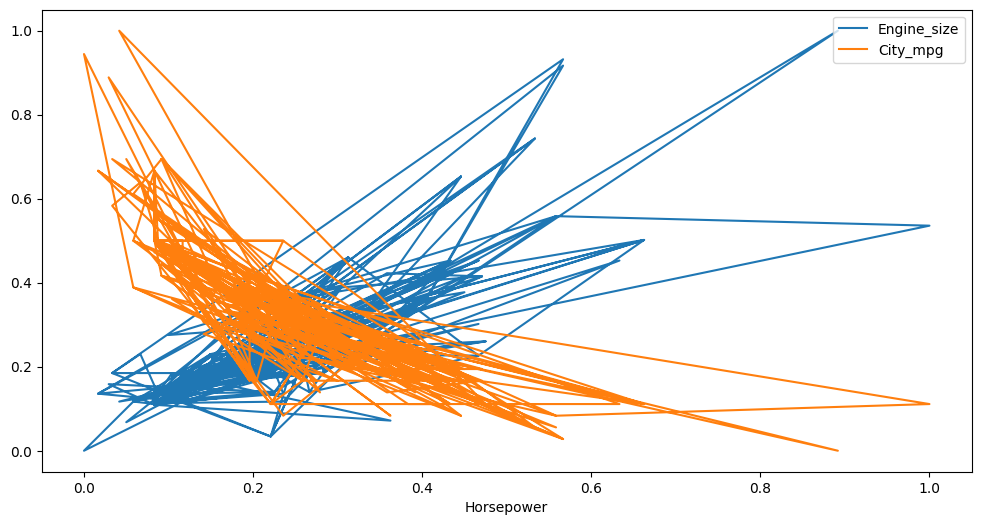

In [21]:
# Task 4.7
sample_data = filtered_data[["Horsepower", "Engine_size", "City_mpg"]]
normalized_engine_size = normalize_column("Engine_size", sample_data)
normalized_city_mpg = normalize_column("City_mpg", sample_data)
normalized_horsepower = normalize_column("Horsepower", sample_data)
plt.figure(figsize=(12, 6))
plt.plot(normalized_horsepower, normalized_engine_size, normalized_horsepower, normalized_city_mpg)
plt.xlabel("Horsepower")
plt.legend(["Engine_size", "City_mpg"])

plt.show();

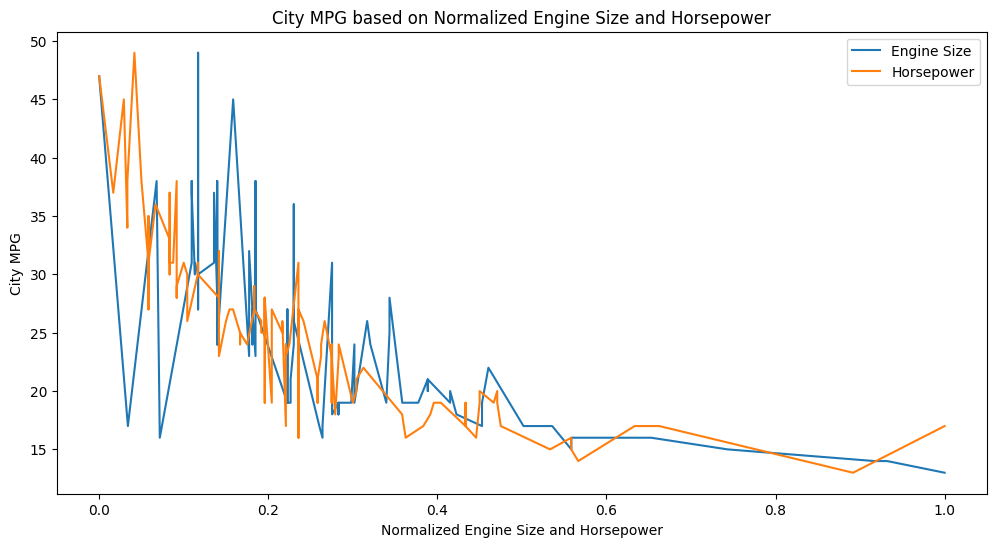

In [22]:
# task 4.8
x = pd.DataFrame({"Engine": normalized_engine_size, "Mpg": filtered_data["City_mpg"]}).sort_values(by = "Engine")
y = pd.DataFrame({"Horsepower": normalized_horsepower, "Mpg": filtered_data["City_mpg"]}).sort_values(by = "Horsepower")
plt.figure(figsize=(12,6))
plt.plot(x["Engine"], x["Mpg"])
plt.plot(y["Horsepower"], y["Mpg"])
plt.ylabel("City MPG")
plt.xlabel("Normalized Engine Size and Horsepower")
plt.title("City MPG based on Normalized Engine Size and Horsepower")
plt.legend(["Engine Size", "Horsepower"])
plt.show();

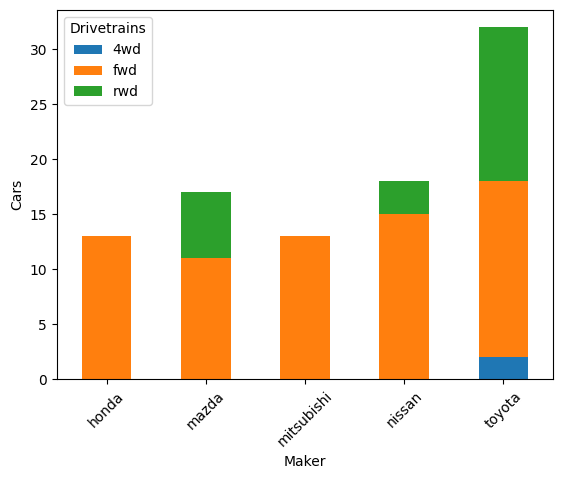

In [23]:
# task 4.9
data = filtered_data.reset_index()
sample_data = data["Maker"].value_counts()[:5]#.reset_index()
models = data[data["Maker"].isin(sample_data.keys())]
sample = models.groupby(["Maker", "Drivetrains"]).size()
sample = sample.unstack().fillna(0)
sample.plot(kind="bar", stacked=True)
plt.ylabel("Cars")
plt.xticks(rotation=45)
plt.show();

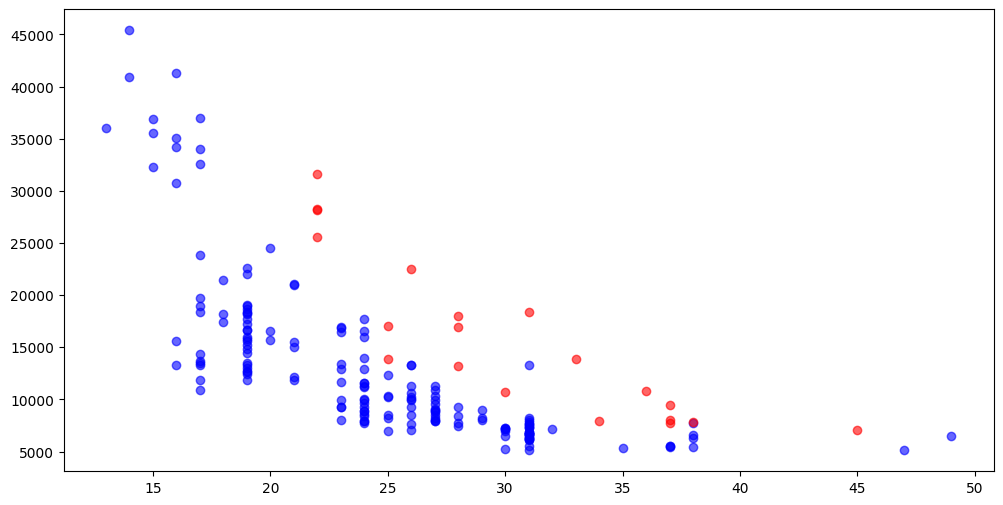

In [30]:
#task 4.10
"""
Understanding  how fuel type impacts car prices and fuel efficiency
"""
gas_samples = filtered_data[filtered_data["Fuel-type"]== "gas"]
diesel_samples = filtered_data[filtered_data["Fuel-type"]== "diesel"]

plt.figure(figsize=(12,6))
plt.scatter(gas_samples["City_mpg"], gas_samples["Price"], color="blue", label="Gas", alpha=0.6)
plt.scatter(diesel_samples["City_mpg"], diesel_samples["Price"], color="red", label="Diesel", alpha=0.6)
plt.show();